In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Reading & Data Types 

In [2]:
#Read the data in pandas
inp= pd.read_csv("./peoplesot company analysis.csv")
inp

,Contract Name,Buying Organization,Description,Contractors,Contract Number,Organization Type,Start Date,NAICS,Award Value ($K),Solicitation Number,Small Business Award,Spending to Date ($K),Primary Requirement,FY 2016 Spending ($K),FY 2017 Spending ($K),FY 2018 Spending ($K),FY 2019 Spending ($K),FY 2020 Spending ($K)
0,GSA SCHEDULE 70 IT EQUIPMENT SOFTWARE AND SERV...,AGRICULTURE,NaN,"MYTHICS, INC. (1TA34)",GS35F0153M,"General Purpose, Public Safety",12/15/2001,"443120 - Computer and Software Stores, 511210 ...",29025.0,NaN,YES,"2,109,024",ALL TECHNICAL SERVICES,"104,856","93,480","54,691","21,838","5,514"
1,INFORMATION TECHNOLOGY SUPPORT SERVICES,ENERGY,Anteon Corporation and Unisys Corporation are ...,UNISYS CORPORATION (09975),00002142,Utilities,10/01/2000,NaN,22500.0,00RP26607,NO,0,NaN,NaN,NaN,NaN,NaN,NaN
2,INFORMATION TECHNOLOGY SUPPORT SERVICES II,ENERGY,The Bonneville Power Administration has an ong...,UNISYS CORPORATION (09975),NaN,Utilities,08/08/2005,NaN,14946.0,NaN,NO,0,NaN,NaN,NaN,NaN,NaN,NaN
3,MSTPO TECHNICAL AND TRANSITIONAL SUPPORT SERVICES,DEFENSE,BearingPoint LLC is fulfilling the Defense Fin...,DELOITTE LLP,HQ042205F0044,Public Safety,03/29/2005,541512 - Computer Systems Design Services,14088.0,HQ042205T0001,NO,0,NaN,NaN,NaN,NaN,NaN,NaN
4,INTEGRATED PERSONNEL AND PAY SYSTEM ARMY INCRE...,ARMY,"CACI, Inc. is fulfilling the Department of the...",CACI INTERNATIONAL INC,NaN,Public Safety,NaN,541512 - Computer Systems Design Services,NaN,PANNWJ19P0000009515,NO,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1092-830004 PEOPLESOFT SOFTWARE SUPPORT,NaN,1092-830004 PEOPLESOFT SOFTWARE SUPPORT,"SEAPINE SOFTWARE, INC",SAQMMA08M2663,NaN,04/01/2008,541511 - Custom Computer Programming Services,4.0,NaN,NO,4,Research & Development,NaN,NaN,NaN,NaN,NaN
202,ONLINE PEOPLESOFT TRAINING FOR THREE STAFF,NaN,ONLINE PEOPLESOFT TRAINING FOR THREE STAFF,ORACLE CORPORATION,F07PO0000131556,NaN,09/11/2007,541519 - Other Computer Related Services,4.0,NaN,NO,4,Professional Services,NaN,NaN,NaN,NaN,NaN
203,IGF::OT::IGF,ENVIRONMENTAL PROTECTION AGENCY,IGF::OT::IGF,SOFTWARE INFORMATION RESOURCE CO (1PQ53),EP15H000087,NaN,12/17/2014,511210 - Software Publishers,4.0,NaN,YES,4,Information Technology,NaN,NaN,NaN,NaN,NaN
204,SOFTWARE SUPPORT RENEWAL PEOPLESOFT MPAC,AGRICULTURE,SOFTWARE SUPPORT RENEWAL PEOPLESOFT MPAC,"MYTHICS, INC. (1TA34)",12724520P0008,NaN,07/09/2020,541519 - Other Computer Related Services,3.0,NaN,NO,3,Information Technology,NaN,NaN,NaN,NaN,2


In [3]:
inp.describe()

,Award Value ($K)
count,1.660000e+02
mean,3.608070e+05
std,2.476867e+06
min,3.000000e+00
25%,2.175000e+01
50%,1.410000e+02
75%,5.870000e+02
max,2.000000e+07


In [4]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Contract Name          205 non-null    object 
 1   Buying Organization    164 non-null    object 
 2   Description            187 non-null    object 
 3   Contractors            206 non-null    object 
 4   Contract Number        185 non-null    object 
 5   Organization Type      54 non-null     object 
 6   Start Date             192 non-null    object 
 7   NAICS                  175 non-null    object 
 8   Award Value ($K)       166 non-null    float64
 9   Solicitation Number    46 non-null     object 
 10  Small Business Award   206 non-null    object 
 11  Spending to Date ($K)  206 non-null    object 
 12  Primary Requirement    162 non-null    object 
 13  FY 2016 Spending ($K)  22 non-null     object 
 14  FY 2017 Spending ($K)  25 non-null     object 
 15  FY 201

In [5]:
inp.shape

(206, 18)

### Impute/Remove Missing values

In [6]:
# Print the null count of each variables of inp0 and inp1.
inp.isnull().sum()

Contract Name              1
Buying Organization       42
Description               19
Contractors                0
Contract Number           21
Organization Type        152
Start Date                14
NAICS                     31
Award Value ($K)          40
Solicitation Number      160
Small Business Award       0
Spending to Date ($K)      0
Primary Requirement       44
FY 2016 Spending ($K)    184
FY 2017 Spending ($K)    181
FY 2018 Spending ($K)    185
FY 2019 Spending ($K)    191
FY 2020 Spending ($K)    193
dtype: int64

In [7]:
# Drop the columns which have more than 40% of missing values.
inp= inp.drop(["FY 2016 Spending ($K)"] , axis= 1)

inp= inp.drop(["FY 2017 Spending ($K)"] , axis= 1)

inp= inp.drop(["FY 2018 Spending ($K)"] , axis= 1)

inp= inp.drop(["FY 2019 Spending ($K)"] , axis= 1)

inp= inp.drop(["FY 2020 Spending ($K)"] , axis= 1)

inp= inp.drop(["Organization Type"] , axis= 1)

inp= inp.drop(["Solicitation Number"] , axis= 1)

In [8]:
inp.head()

,Contract Name,Buying Organization,Description,Contractors,Contract Number,Start Date,NAICS,Award Value ($K),Small Business Award,Spending to Date ($K),Primary Requirement
0,GSA SCHEDULE 70 IT EQUIPMENT SOFTWARE AND SERV...,AGRICULTURE,NaN,"MYTHICS, INC. (1TA34)",GS35F0153M,12/15/2001,"443120 - Computer and Software Stores, 511210 ...",29025.0,YES,"2,109,024",ALL TECHNICAL SERVICES
1,INFORMATION TECHNOLOGY SUPPORT SERVICES,ENERGY,Anteon Corporation and Unisys Corporation are ...,UNISYS CORPORATION (09975),00002142,10/01/2000,NaN,22500.0,NO,0,NaN
2,INFORMATION TECHNOLOGY SUPPORT SERVICES II,ENERGY,The Bonneville Power Administration has an ong...,UNISYS CORPORATION (09975),NaN,08/08/2005,NaN,14946.0,NO,0,NaN
3,MSTPO TECHNICAL AND TRANSITIONAL SUPPORT SERVICES,DEFENSE,BearingPoint LLC is fulfilling the Defense Fin...,DELOITTE LLP,HQ042205F0044,03/29/2005,541512 - Computer Systems Design Services,14088.0,NO,0,NaN
4,INTEGRATED PERSONNEL AND PAY SYSTEM ARMY INCRE...,ARMY,"CACI, Inc. is fulfilling the Department of the...",CACI INTERNATIONAL INC,NaN,NaN,541512 - Computer Systems Design Services,NaN,NO,0,NaN


In [9]:
inp.isnull().sum()

Contract Name             1
Buying Organization      42
Description              19
Contractors               0
Contract Number          21
Start Date               14
NAICS                    31
Award Value ($K)         40
Small Business Award      0
Spending to Date ($K)     0
Primary Requirement      44
dtype: int64

In [10]:
#  Calculate Columns with High Missing null percentage (>= 50%)
nullcols_app =  100 * (inp.isnull().sum() / len(inp.index))
nullcols_app = nullcols_app[nullcols_app.values >= 50]
nullcols_app = list(nullcols_app.index)
len(nullcols_app)

0

In [11]:
# Checking Null percentage again
100 * (inp.isnull().sum() / len(inp.index))

Contract Name             0.485437
Buying Organization      20.388350
Description               9.223301
Contractors               0.000000
Contract Number          10.194175
Start Date                6.796117
NAICS                    15.048544
Award Value ($K)         19.417476
Small Business Award      0.000000
Spending to Date ($K)     0.000000
Primary Requirement      21.359223
dtype: float64

### As we can see that , 'Award Value' columns is having very few null values rows. Hence let's try to impute the missing values

### Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean, hence we use  Median for this and we will fill those missing values  with median value

In [12]:
# Filling missing values with median

values=inp['Award Value ($K)'].median()

inp.loc[inp['Award Value ($K)'].isnull(),'Award Value ($K)']=values

In [13]:
# Removing rows having null values greater than or equal to 30%

row=inp.isnull().sum(axis=1)
row=list(row[row.values>=0.3*len(inp)].index)
inp.drop(labels=row,axis=0,inplace=True)
print(len(row))

0


In [14]:
inp.head()

,Contract Name,Buying Organization,Description,Contractors,Contract Number,Start Date,NAICS,Award Value ($K),Small Business Award,Spending to Date ($K),Primary Requirement
0,GSA SCHEDULE 70 IT EQUIPMENT SOFTWARE AND SERV...,AGRICULTURE,NaN,"MYTHICS, INC. (1TA34)",GS35F0153M,12/15/2001,"443120 - Computer and Software Stores, 511210 ...",29025.0,YES,"2,109,024",ALL TECHNICAL SERVICES
1,INFORMATION TECHNOLOGY SUPPORT SERVICES,ENERGY,Anteon Corporation and Unisys Corporation are ...,UNISYS CORPORATION (09975),00002142,10/01/2000,NaN,22500.0,NO,0,NaN
2,INFORMATION TECHNOLOGY SUPPORT SERVICES II,ENERGY,The Bonneville Power Administration has an ong...,UNISYS CORPORATION (09975),NaN,08/08/2005,NaN,14946.0,NO,0,NaN
3,MSTPO TECHNICAL AND TRANSITIONAL SUPPORT SERVICES,DEFENSE,BearingPoint LLC is fulfilling the Defense Fin...,DELOITTE LLP,HQ042205F0044,03/29/2005,541512 - Computer Systems Design Services,14088.0,NO,0,NaN
4,INTEGRATED PERSONNEL AND PAY SYSTEM ARMY INCRE...,ARMY,"CACI, Inc. is fulfilling the Department of the...",CACI INTERNATIONAL INC,NaN,NaN,541512 - Computer Systems Design Services,141.0,NO,0,NaN


In [15]:
inp.isnull().sum()

Contract Name             1
Buying Organization      42
Description              19
Contractors               0
Contract Number          21
Start Date               14
NAICS                    31
Award Value ($K)          0
Small Business Award      0
Spending to Date ($K)     0
Primary Requirement      44
dtype: int64

In [16]:
inp.drop('Start Date',axis=1,inplace=True)

In [17]:
inp.head()

,Contract Name,Buying Organization,Description,Contractors,Contract Number,NAICS,Award Value ($K),Small Business Award,Spending to Date ($K),Primary Requirement
0,GSA SCHEDULE 70 IT EQUIPMENT SOFTWARE AND SERV...,AGRICULTURE,NaN,"MYTHICS, INC. (1TA34)",GS35F0153M,"443120 - Computer and Software Stores, 511210 ...",29025.0,YES,"2,109,024",ALL TECHNICAL SERVICES
1,INFORMATION TECHNOLOGY SUPPORT SERVICES,ENERGY,Anteon Corporation and Unisys Corporation are ...,UNISYS CORPORATION (09975),00002142,NaN,22500.0,NO,0,NaN
2,INFORMATION TECHNOLOGY SUPPORT SERVICES II,ENERGY,The Bonneville Power Administration has an ong...,UNISYS CORPORATION (09975),NaN,NaN,14946.0,NO,0,NaN
3,MSTPO TECHNICAL AND TRANSITIONAL SUPPORT SERVICES,DEFENSE,BearingPoint LLC is fulfilling the Defense Fin...,DELOITTE LLP,HQ042205F0044,541512 - Computer Systems Design Services,14088.0,NO,0,NaN
4,INTEGRATED PERSONNEL AND PAY SYSTEM ARMY INCRE...,ARMY,"CACI, Inc. is fulfilling the Department of the...",CACI INTERNATIONAL INC,NaN,541512 - Computer Systems Design Services,141.0,NO,0,NaN


In [18]:
#No of retained rows in percentage
print(str(round((inp.shape[0]/307511)*100,2))+'%')

0.07%


#### So we have retained around 70.00% of the existing dataset after our data cleaning drive which is good enough to proceed with our EDA.


## Rename Datafraame

In [19]:
inp = inp.rename(columns={'Award Value ($K)': 'AwardValue', 'Small Business Award': 'SBA' , 'Contract Name': 'Contract' , 'Buying Organization' : 'Organization'})
inp

,Contract,Organization,Description,Contractors,Contract Number,NAICS,AwardValue,SBA,Spending to Date ($K),Primary Requirement
0,GSA SCHEDULE 70 IT EQUIPMENT SOFTWARE AND SERV...,AGRICULTURE,NaN,"MYTHICS, INC. (1TA34)",GS35F0153M,"443120 - Computer and Software Stores, 511210 ...",29025.0,YES,"2,109,024",ALL TECHNICAL SERVICES
1,INFORMATION TECHNOLOGY SUPPORT SERVICES,ENERGY,Anteon Corporation and Unisys Corporation are ...,UNISYS CORPORATION (09975),00002142,NaN,22500.0,NO,0,NaN
2,INFORMATION TECHNOLOGY SUPPORT SERVICES II,ENERGY,The Bonneville Power Administration has an ong...,UNISYS CORPORATION (09975),NaN,NaN,14946.0,NO,0,NaN
3,MSTPO TECHNICAL AND TRANSITIONAL SUPPORT SERVICES,DEFENSE,BearingPoint LLC is fulfilling the Defense Fin...,DELOITTE LLP,HQ042205F0044,541512 - Computer Systems Design Services,14088.0,NO,0,NaN
4,INTEGRATED PERSONNEL AND PAY SYSTEM ARMY INCRE...,ARMY,"CACI, Inc. is fulfilling the Department of the...",CACI INTERNATIONAL INC,NaN,541512 - Computer Systems Design Services,141.0,NO,0,NaN
...,...,...,...,...,...,...,...,...,...,...
201,1092-830004 PEOPLESOFT SOFTWARE SUPPORT,NaN,1092-830004 PEOPLESOFT SOFTWARE SUPPORT,"SEAPINE SOFTWARE, INC",SAQMMA08M2663,541511 - Custom Computer Programming Services,4.0,NO,4,Research & Development
202,ONLINE PEOPLESOFT TRAINING FOR THREE STAFF,NaN,ONLINE PEOPLESOFT TRAINING FOR THREE STAFF,ORACLE CORPORATION,F07PO0000131556,541519 - Other Computer Related Services,4.0,NO,4,Professional Services
203,IGF::OT::IGF,ENVIRONMENTAL PROTECTION AGENCY,IGF::OT::IGF,SOFTWARE INFORMATION RESOURCE CO (1PQ53),EP15H000087,511210 - Software Publishers,4.0,YES,4,Information Technology
204,SOFTWARE SUPPORT RENEWAL PEOPLESOFT MPAC,AGRICULTURE,SOFTWARE SUPPORT RENEWAL PEOPLESOFT MPAC,"MYTHICS, INC. (1TA34)",12724520P0008,541519 - Other Computer Related Services,3.0,NO,3,Information Technology


### Droping rows with NAN VALUE

## Plotting Graph

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

## Award Value ($K)

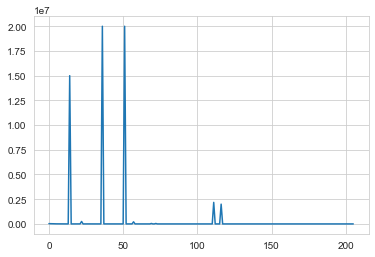

In [21]:
inp.AwardValue.plot()
plt.show()

## Countthe dataframe 

In [22]:
inp['SBA'].astype('category').value_counts()

NO     126
YES     80
Name: SBA, dtype: int64

In [23]:
inp['Primary Requirement'].astype('category').value_counts()

Information Technology                                                                                                                                          124
Professional Services                                                                                                                                            28
Research & Development                                                                                                                                            2
ALL TECHNICAL SERVICES                                                                                                                                            2
Other Products & Materials                                                                                                                                        1
Machinery, Equipment & Tools                                                                                                                                      1
Information Tech

In [24]:
inp.Contractors

0                         MYTHICS, INC. (1TA34)
1                    UNISYS CORPORATION (09975)
2                    UNISYS CORPORATION (09975)
3                                  DELOITTE LLP
4                        CACI INTERNATIONAL INC
                         ...                   
201                       SEAPINE SOFTWARE, INC
202                          ORACLE CORPORATION
203    SOFTWARE INFORMATION RESOURCE CO (1PQ53)
204                       MYTHICS, INC. (1TA34)
205                          ORACLE CORPORATION
Name: Contractors, Length: 206, dtype: object

In [25]:
inp['Contractors'].astype('category').value_counts()

ORACLE CORPORATION                                               33
DLT SOLUTIONS, LLC (0S0H9)                                       23
PEOPLESOFT INC                                                   16
HL GROUP, INC (4B0G6)                                            13
MYTHICS, INC. (1TA34)                                            12
                                                                 ..
KARDA SYSTEMS, LLC (4Y9Y2)                                        1
KALANI CONSULTING, INC. (5N1Q4)                                   1
IMMIXGROUP, INC. (1KHG0)                                          1
SCIENCE APPLICATIONS INTERNATIONAL CORPORATION (SAIC) (6UW89)     1
AAA COMPLETE BUILDING SERVICES                                    1
Name: Contractors, Length: 80, dtype: int64

In [26]:
inp.isnull().sum()

Contract                  1
Organization             42
Description              19
Contractors               0
Contract Number          21
NAICS                    31
AwardValue                0
SBA                       0
Spending to Date ($K)     0
Primary Requirement      44
dtype: int64

In [27]:
inp.Contract

0      GSA SCHEDULE 70 IT EQUIPMENT SOFTWARE AND SERV...
1                INFORMATION TECHNOLOGY SUPPORT SERVICES
2             INFORMATION TECHNOLOGY SUPPORT SERVICES II
3      MSTPO TECHNICAL AND TRANSITIONAL SUPPORT SERVICES
4      INTEGRATED PERSONNEL AND PAY SYSTEM ARMY INCRE...
                             ...                        
201              1092-830004 PEOPLESOFT SOFTWARE SUPPORT
202           ONLINE PEOPLESOFT TRAINING FOR THREE STAFF
203                                         IGF::OT::IGF
204             SOFTWARE SUPPORT RENEWAL PEOPLESOFT MPAC
205    ORACLE UNIVERSITY ONLINE VIRTUAL CLASS COURSE ...
Name: Contract, Length: 206, dtype: object

In [28]:
inp.Contract.isnull().sum()

1

In [29]:
inp.Contract.dropna()
inp

,Contract,Organization,Description,Contractors,Contract Number,NAICS,AwardValue,SBA,Spending to Date ($K),Primary Requirement
0,GSA SCHEDULE 70 IT EQUIPMENT SOFTWARE AND SERV...,AGRICULTURE,NaN,"MYTHICS, INC. (1TA34)",GS35F0153M,"443120 - Computer and Software Stores, 511210 ...",29025.0,YES,"2,109,024",ALL TECHNICAL SERVICES
1,INFORMATION TECHNOLOGY SUPPORT SERVICES,ENERGY,Anteon Corporation and Unisys Corporation are ...,UNISYS CORPORATION (09975),00002142,NaN,22500.0,NO,0,NaN
2,INFORMATION TECHNOLOGY SUPPORT SERVICES II,ENERGY,The Bonneville Power Administration has an ong...,UNISYS CORPORATION (09975),NaN,NaN,14946.0,NO,0,NaN
3,MSTPO TECHNICAL AND TRANSITIONAL SUPPORT SERVICES,DEFENSE,BearingPoint LLC is fulfilling the Defense Fin...,DELOITTE LLP,HQ042205F0044,541512 - Computer Systems Design Services,14088.0,NO,0,NaN
4,INTEGRATED PERSONNEL AND PAY SYSTEM ARMY INCRE...,ARMY,"CACI, Inc. is fulfilling the Department of the...",CACI INTERNATIONAL INC,NaN,541512 - Computer Systems Design Services,141.0,NO,0,NaN
...,...,...,...,...,...,...,...,...,...,...
201,1092-830004 PEOPLESOFT SOFTWARE SUPPORT,NaN,1092-830004 PEOPLESOFT SOFTWARE SUPPORT,"SEAPINE SOFTWARE, INC",SAQMMA08M2663,541511 - Custom Computer Programming Services,4.0,NO,4,Research & Development
202,ONLINE PEOPLESOFT TRAINING FOR THREE STAFF,NaN,ONLINE PEOPLESOFT TRAINING FOR THREE STAFF,ORACLE CORPORATION,F07PO0000131556,541519 - Other Computer Related Services,4.0,NO,4,Professional Services
203,IGF::OT::IGF,ENVIRONMENTAL PROTECTION AGENCY,IGF::OT::IGF,SOFTWARE INFORMATION RESOURCE CO (1PQ53),EP15H000087,511210 - Software Publishers,4.0,YES,4,Information Technology
204,SOFTWARE SUPPORT RENEWAL PEOPLESOFT MPAC,AGRICULTURE,SOFTWARE SUPPORT RENEWAL PEOPLESOFT MPAC,"MYTHICS, INC. (1TA34)",12724520P0008,541519 - Other Computer Related Services,3.0,NO,3,Information Technology


In [30]:
#find the mode of Contract in inp1
Contract_mode  = inp.Contract.mode()[0]
Contract_mode

'INFORMATION TECHNOLOGY SUPPORT SERVICES II'

### Fill the missing values.


In [31]:
inp.Contract.fillna(Contract_mode , inplace = True)
inp.Contract.value_counts(normalize=True)

INFORMATION TECHNOLOGY SUPPORT SERVICES II                                                                                                0.038835
PEOPLESOFT HCM EXPERTISE FOR ENTERPRISE HUMAN RESOURCES AND PAYROLL APPLICATION SUPPORT SERVICES                                          0.029126
PEOPLESOFT CRM HRHD ENHANCEMENT AND EXPANSION                                                                                             0.019417
PEOPLESOFT                                                                                                                                0.014563
HHS PSC HUMAN RESOURCES LINE OF BUSINESS SHARED SERVICES CENTER                                                                           0.014563
                                                                                                                                            ...   
PEOPLESOFT ENTERPRISE SOFTWARE UPDATE LICENSE & SUPPORT COSTING FOR PUBLIC SEC - REPORTED REVENUES PERPETUAL - USER: T

In [32]:
inp.Contract.isnull().sum()

0

#### Handling missing values in Organization column 

In [33]:
#count the missing values in response column in inp.
inp.Organization.isnull().sum()

42

In [34]:
inp.shape

(206, 10)

In [35]:
#calculate the percentage of missing values in response column. 
float(100.0*42/205)

20.48780487804878

In [36]:
#drop the records with Organization missings in inp.
inp= inp[~inp.Organization.isnull()].copy()
inp.shape

(164, 10)

In [37]:
inp.isnull().sum()

Contract                  0
Organization              0
Description              14
Contractors               0
Contract Number          18
NAICS                    26
AwardValue                0
SBA                       0
Spending to Date ($K)     0
Primary Requirement      39
dtype: int64

## Handelling missing value of NAICS

In [38]:
#drop the records with NAICS missings in inp.
inp= inp[~inp.NAICS.isnull()].copy()
inp.shape

(138, 10)

In [39]:
inp.isnull().sum()

Contract                  0
Organization              0
Description              14
Contractors               0
Contract Number           5
NAICS                     0
AwardValue                0
SBA                       0
Spending to Date ($K)     0
Primary Requirement      13
dtype: int64

## Session- 3, Univariate Analysis 

## Organization

In [40]:
#describe the Organization variable of inp
inp.Organization.describe()

count                     138
unique                     33
top       TREASURY >> US MINT
freq                       18
Name: Organization, dtype: object

In [41]:
inp.Organization.isnull().sum()

0

In [51]:
inp['Organization'].astype('category').value_counts()

TREASURY >> US MINT                                      18
AGRICULTURE                                              17
STATE                                                    17
ENVIRONMENTAL PROTECTION AGENCY                          13
HOUSING AND URBAN DEVELOPMENT                             9
HEALTH AND HUMAN SERVICES                                 7
ARMY                                                      5
DEFENSE                                                   5
ENERGY                                                    5
HOMELAND SECURITY                                         4
COMMERCE                                                  4
ENERGY                                                    3
JUSTICE                                                   3
AIR FORCE                                                 2
US HOLOCAUST MEMORIAL COUNCIL                             2
 FEDERAL AVIATION ADMINISTRATION                          2
TREASURY >> INTERNAL REVENUE SERVICE    

## Contractors

In [42]:
inp.Contractors.describe()

count                    138
unique                    49
top       ORACLE CORPORATION
freq                      21
Name: Contractors, dtype: object

In [43]:
inp.Contractors.head()

0             MYTHICS, INC. (1TA34)
3                      DELOITTE LLP
4            CACI INTERNATIONAL INC
7    GOLDBELT, INCORPORATED (32VK9)
9     TERATHINK CORPORATION (3SWH2)
Name: Contractors, dtype: object

In [44]:
inp.Contractors.isnull().sum()

0

In [45]:
inp['Contractors'].astype('category').value_counts()

ORACLE CORPORATION                                                    21
DLT SOLUTIONS, LLC (0S0H9)                                            16
HL GROUP, INC (4B0G6)                                                 13
PEOPLESOFT INC                                                        11
LANCER INFORMATION SOLUTIONS LLC (4NEN1)                               8
MYTHICS, INC. (1TA34)                                                  8
UNDISCLOSED FOREIGN CONTRACTORS (35KC0)                                4
SOFTWARE INFORMATION RESOURCE CO (1PQ53)                               4
ASPECT SOFTWARE INC (51ZM4)                                            3
TRANSAMERICA TRAINING MANAGEMENT, INC (5E5U5)                          3
MAVERICK SOLUTIONS INC                                                 3
IBM CORPORATION (INTERNATIONAL BUSINESS MACHINES)                      2
AEON NEXUS CORPORATION (1SVT0)                                         2
LAREDO TECHNICAL SERVICES INC (4YDG9)              

## Contract

In [46]:
inp.Contract.describe()

count                                                   138
unique                                                  124
top       PEOPLESOFT HCM EXPERTISE FOR ENTERPRISE HUMAN ...
freq                                                      5
Name: Contract, dtype: object

In [47]:
inp.Contract.head()

0    GSA SCHEDULE 70 IT EQUIPMENT SOFTWARE AND SERV...
3    MSTPO TECHNICAL AND TRANSITIONAL SUPPORT SERVICES
4    INTEGRATED PERSONNEL AND PAY SYSTEM ARMY INCRE...
7        PEOPLESOFT HUMAN RESOURCES APPLICATION SYSTEM
9    PEOPLESOFT DEVELOPMENT ACTITIVITES AND FOLLOW-...
Name: Contract, dtype: object

In [69]:
inp['Contract'].astype('category').value_counts()

PEOPLESOFT HCM EXPERTISE FOR ENTERPRISE HUMAN RESOURCES AND PAYROLL APPLICATION SUPPORT SERVICES                                                    5
ASSET ADVANTAGE FOR PEOPLESOFT ANNUAL MAINTENANCE                                                                                                   3
PEOPLESOFT LICENSES                                                                                                                                 2
IGF::OT::IGF                                                                                                                                        2
GSA SCHEDULE 70 IT EQUIPMENT SOFTWARE AND SERVICES                                                                                                  2
                                                                                                                                                   ..
PEOPLESOFT ENTERPRISE PEOPLETOOLS LICENSE                                                           

# SMALL BUSINESS AWARD (SBA)

In [48]:
inp.SBA.describe()

count     138
unique      2
top        NO
freq       73
Name: SBA, dtype: object

In [49]:
inp.SBA.head()

0    YES
3     NO
4     NO
7     NO
9    YES
Name: SBA, dtype: object

In [50]:
inp['SBA'].astype('category').value_counts()

NO     73
YES    65
Name: SBA, dtype: int64

In [51]:
inp.SBA.isnull().sum()

0

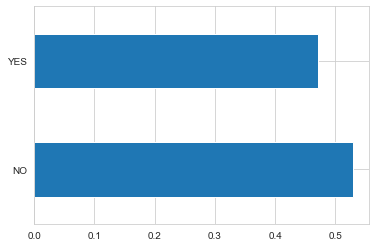

In [52]:
#plot the bar graph of SBA marital status categories
inp.SBA.value_counts(normalize = True).plot.barh()
plt.show()

## Description

In [52]:
inp.Description.describe()

count                                                   124
unique                                                  114
top       ASSET ADVANTAGE FOR PEOPLESOFT ANNUAL MAINTENANCE
freq                                                      3
Name: Description, dtype: object

In [53]:
inp.Description.head()

0                                                  NaN
3    BearingPoint LLC is fulfilling the Defense Fin...
4    CACI, Inc. is fulfilling the Department of the...
7    SUMMARY\r\n\r\nBuchanan & Edwards is fulfillin...
9    PEOPLESOFT DEVELOPMENT ACTITIVITES AND FOLLOW-...
Name: Description, dtype: object

In [54]:
inp.Description.isnull().sum()

14

In [55]:
#find the mode of Description in inp
Description_mode  = inp.Description.mode()[0]
Description_mode

'ASSET ADVANTAGE FOR PEOPLESOFT ANNUAL MAINTENANCE'

In [56]:
inp.Description.fillna(Description_mode , inplace = True)
inp.Description.value_counts(normalize=True)

ASSET ADVANTAGE FOR PEOPLESOFT ANNUAL MAINTENANCE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [57]:
inp.Description.isnull().sum()

0

In [58]:
inp.Description.describe()

count                                                   138
unique                                                  114
top       ASSET ADVANTAGE FOR PEOPLESOFT ANNUAL MAINTENANCE
freq                                                     17
Name: Description, dtype: object

In [59]:
inp['Description'].astype('category').value_counts()

ASSET ADVANTAGE FOR PEOPLESOFT ANNUAL MAINTENANCE                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Primary Requirement

In [60]:
inp['Primary Requirement']

0      ALL TECHNICAL SERVICES
3                         NaN
4                         NaN
7                         NaN
9      Information Technology
                ...          
199     Professional Services
200     Professional Services
203    Information Technology
204    Information Technology
205    Information Technology
Name: Primary Requirement, Length: 138, dtype: object

In [61]:
inp['Primary Requirement'].describe()

count                        125
unique                         7
top       Information Technology
freq                         102
Name: Primary Requirement, dtype: object

In [62]:
inp['Primary Requirement'].isnull().sum()

13

In [63]:
Requirement_mode = inp['Primary Requirement'].mode()[0]
Requirement_mode

'Information Technology'

In [64]:
inp['Primary Requirement'].fillna(Requirement_mode , inplace = True)
inp['Primary Requirement'].value_counts(normalize=True)

Information Technology                                                                                                                                          0.833333
Professional Services                                                                                                                                           0.123188
ALL TECHNICAL SERVICES                                                                                                                                          0.014493
Information Technology, Professional Services                                                                                                                   0.007246
Electric & Electronic Components & Parts,\nInformation Technology, \nMachinery, Equipment & Tools, \nMedical & Scientific Equipment, P\nrofessional Services    0.007246
Electric & Electronic Components & Parts,\n Information Technology, \nMachinery, Equipment & Tools, \nProfessional Services, \nResearch & Development      

In [65]:
inp['Primary Requirement'].isnull().sum()

0

In [66]:
inp['Primary Requirement'].describe()

count                        138
unique                         7
top       Information Technology
freq                         115
Name: Primary Requirement, dtype: object

In [68]:
inp['Primary Requirement'].astype('category').value_counts()

Information Technology                                                                                                                                          115
Professional Services                                                                                                                                            17
ALL TECHNICAL SERVICES                                                                                                                                            2
Information Technology, Professional Services                                                                                                                     1
Electric & Electronic Components & Parts,\nInformation Technology, \nMachinery, Equipment & Tools, \nMedical & Scientific Equipment, P\nrofessional Services      1
Electric & Electronic Components & Parts,\n Information Technology, \nMachinery, Equipment & Tools, \nProfessional Services, \nResearch & Development             1
Electric & Elect

# Graphical Univarite Analysis

In [67]:
# Count plotting in logarithmic scale

def uniplot(inp,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 30
    plt.rcParams['axes.titlesize'] = 32
    plt.rcParams['axes.titlepad'] = 40
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(inp[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = inp, x= col, order=inp[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

# Plotting for Primary Requirement type in logarithmic scale



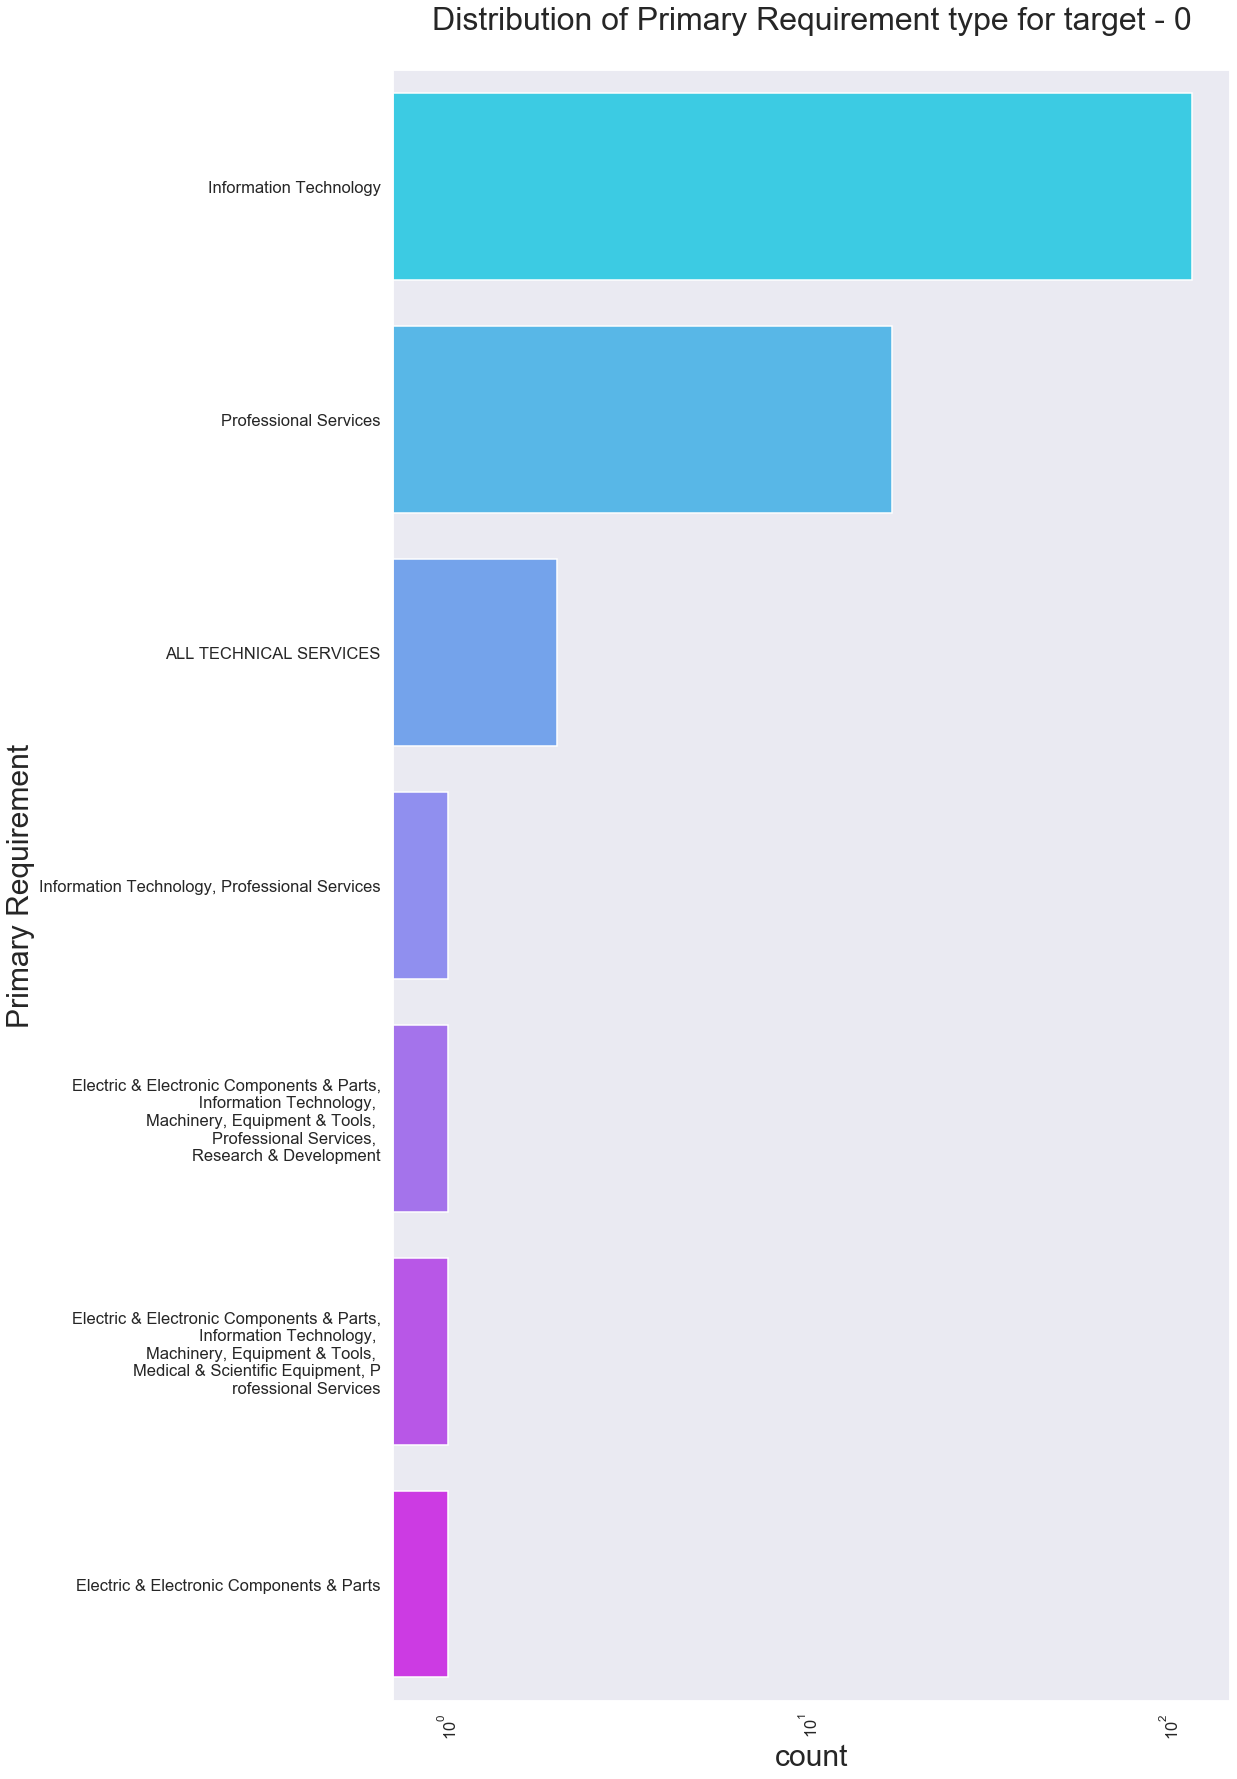

In [68]:
sns.set_style('dark')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.titlepad'] = 40

plt.title("Distribution of Primary Requirement type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=inp,y='Primary Requirement',order=inp['Primary Requirement'].value_counts().index,palette='cool')

plt.show()

 ALL Technical Service. =  (Architecture Engineering and Construction, Chemicals, Fuels, Lubricants & Oil, Defense & Aerospace, Electric & Electronic Components & Parts, Engines and Mechanical Equipment, Food & Sanitary Products and Services, Furniture & Appliances, Health Services, Information Technology, Land Vehicles & Equipment, Machinery, Equipment & Tools, Medical & Scientific Equipment, Operations & Maintenance, Other Products & Materials, Professional Services, Research & Development, Ship Building, Social Services)

# Plotting for Organization type in logarithmic scale


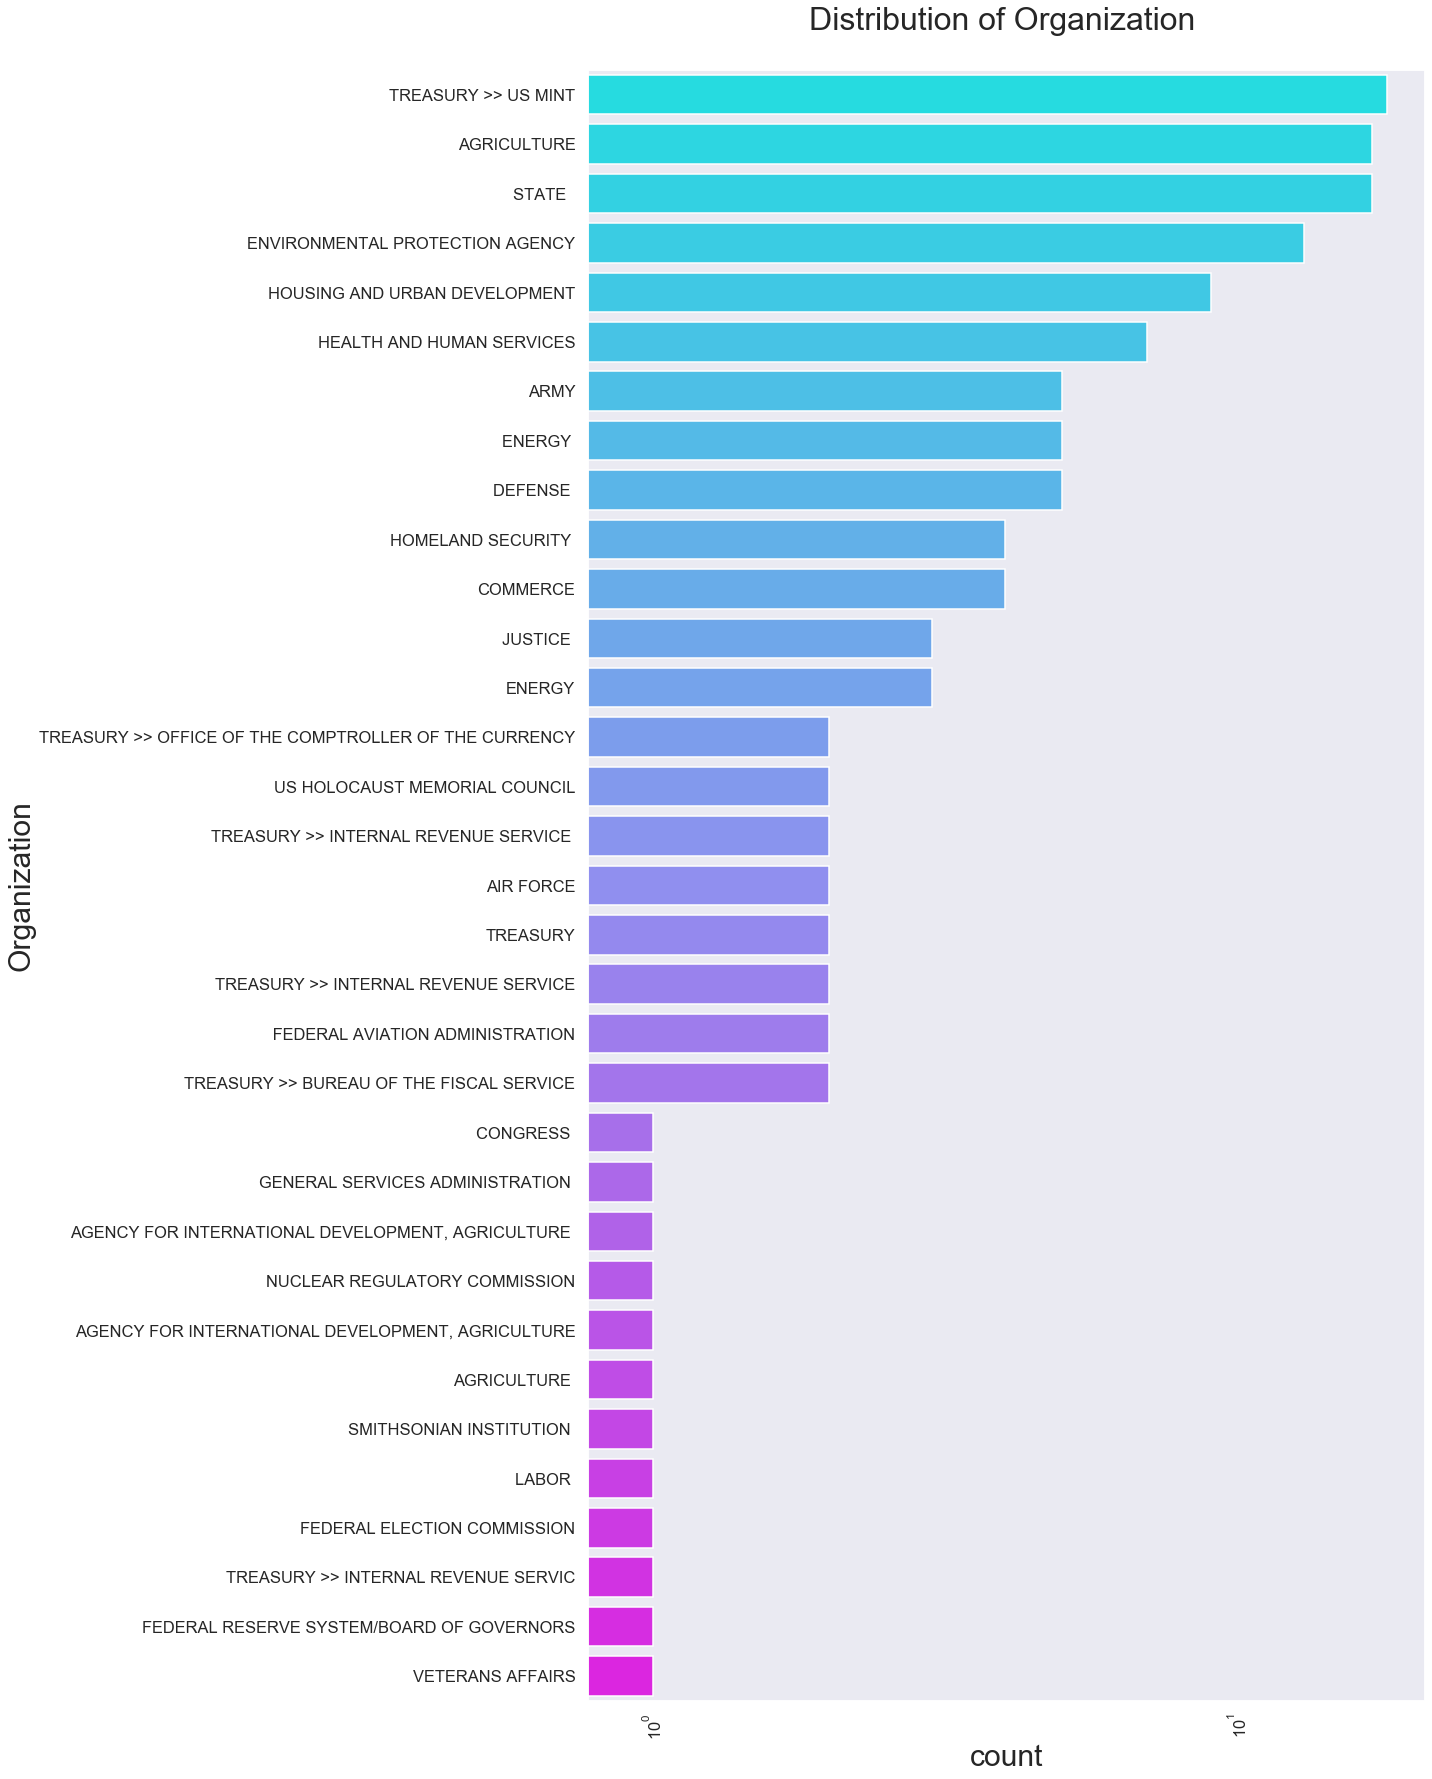

In [78]:
sns.set_style('dark')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.titlepad'] = 40

plt.title("Distribution of Organization ")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=inp,y='Organization',order=inp['Organization'].value_counts().index,palette='cool')

plt.show()

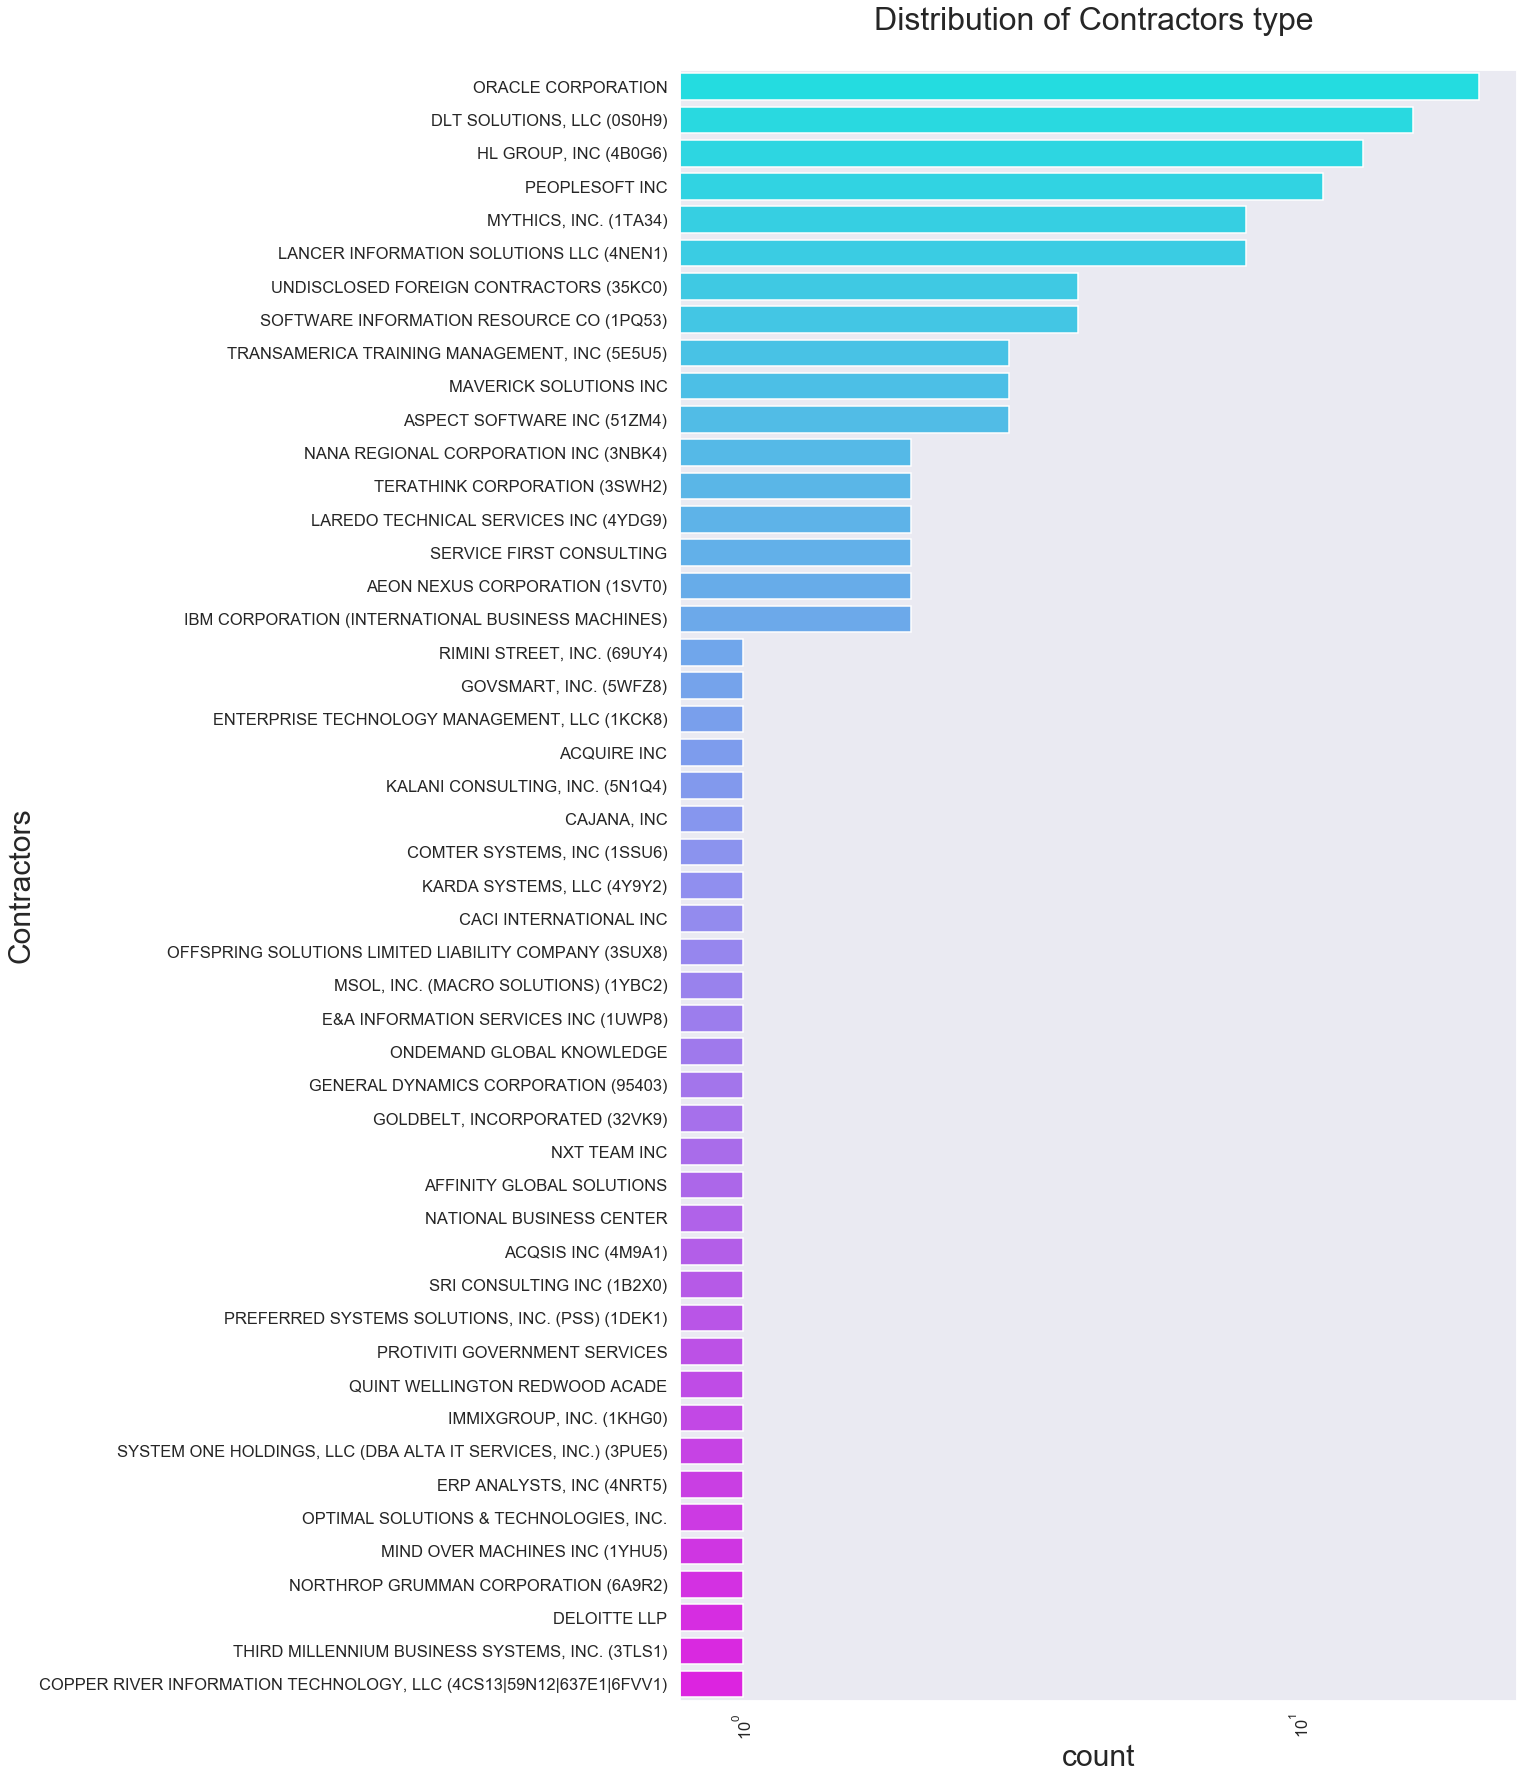

In [77]:
sns.set_style('dark')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 30
plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.titlepad'] = 40

plt.title("Distribution of Contractors type ")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=inp,y='Contractors',order=inp['Contractors'].value_counts().index,palette='cool')

plt.show()

# BIVARIATE ANALYSIS


In [71]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 205
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Contract               138 non-null    object 
 1   Organization           138 non-null    object 
 2   Description            138 non-null    object 
 3   Contractors            138 non-null    object 
 4   Contract Number        133 non-null    object 
 5   NAICS                  138 non-null    object 
 6   AwardValue             138 non-null    float64
 7   SBA                    138 non-null    object 
 8   Spending to Date ($K)  138 non-null    object 
 9   Primary Requirement    138 non-null    object 
dtypes: float64(1), object(9)
memory usage: 16.9+ KB


#  Numerical categorical variable

### AwardValue VS SBA


In [72]:
#groupby the response to find the mean of the AwardValue with SBA no & yes seperatly.
inp.groupby("SBA")['AwardValue'].mean()

SBA
NO      34268.630137
YES    649761.738462
Name: AwardValue, dtype: float64

In [73]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp.groupby("SBA")['AwardValue'].median()

SBA
NO     141.0
YES    141.0
Name: AwardValue, dtype: float64

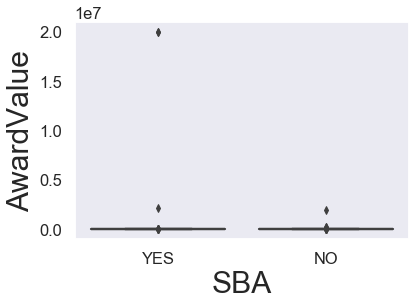

In [74]:
#plot the box plot of AwardValue for yes & no responses.
sns.boxplot(data=inp , x="SBA" , y="AwardValue")
plt.show()

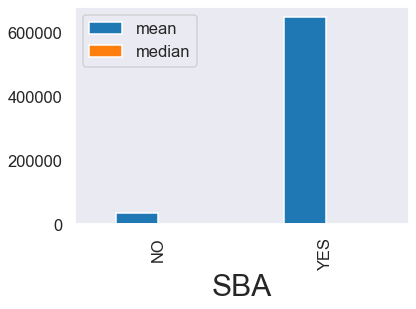

In [75]:
#plot the bar graph of AwardValue mean an median with SBA.
inp.groupby("SBA")['AwardValue'].aggregate(["mean","median"]).plot.bar()
plt.show()

## It clearly shows's that the business with SBA has higher renue than non small business company

In [80]:
inp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 0 to 205
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Contract               138 non-null    object 
 1   Organization           138 non-null    object 
 2   Description            138 non-null    object 
 3   Contractors            138 non-null    object 
 4   Contract Number        133 non-null    object 
 5   NAICS                  138 non-null    object 
 6   AwardValue             138 non-null    float64
 7   SBA                    138 non-null    object 
 8   Spending to Date ($K)  138 non-null    object 
 9   Primary Requirement    138 non-null    object 
dtypes: float64(1), object(9)
memory usage: 16.9+ KB


In [83]:
inp.Contract.describe()

count                                                   138
unique                                                  124
top       PEOPLESOFT HCM EXPERTISE FOR ENTERPRISE HUMAN ...
freq                                                      5
Name: Contract, dtype: object

### Minimum Revnue ($K)

In [84]:
inp.AwardValue.sum() #value in $k

44736123.0

### So the minimum overall Business  for PeopleSoft Companies is ($ 44736123.0 K) 

## Grouping using df.groupby()

In [88]:
# Which customer segments are the least profitable? 

# Step 1. Grouping: First, we will group the dataframe by customer segments
df_by_Contractors = inp.groupby('Contractors')
df_by_Contractors

In [111]:
df_by_Contractors['AwardValue','Organization'].sum()

C:\Users\AKSHAY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,AwardValue
Contractors,
ACQSIS INC (4M9A1),455.0
ACQUIRE INC,247.0
AEON NEXUS CORPORATION (1SVT0),2450.0
AFFINITY GLOBAL SOLUTIONS,235.0
ASPECT SOFTWARE INC (51ZM4),233.0
CACI INTERNATIONAL INC,141.0
"CAJANA, INC",1569.0
"COMTER SYSTEMS, INC (1SSU6)",141.0
"COPPER RIVER INFORMATION TECHNOLOGY, LLC (4CS13|59N12|637E1|6FVV1)",20000000.0


In [113]:
# For better readability, you may want to sort the summarised series:
df_by_Contractors['AwardValue'].sum().sort_values(ascending = False)

Contractors
NANA REGIONAL CORPORATION INC (3NBK4)                                 20000417.0
COPPER RIVER INFORMATION TECHNOLOGY, LLC (4CS13|59N12|637E1|6FVV1)    20000000.0
DLT SOLUTIONS, LLC (0S0H9)                                             4180736.0
GENERAL DYNAMICS CORPORATION (95403)                                    250000.0
IBM CORPORATION (INTERNATIONAL BUSINESS MACHINES)                       213476.0
MYTHICS, INC. (1TA34)                                                    29668.0
DELOITTE LLP                                                             14088.0
ORACLE CORPORATION                                                        8821.0
GOLDBELT, INCORPORATED (32VK9)                                            5500.0
TERATHINK CORPORATION (3SWH2)                                             4705.0
GOVSMART, INC. (5WFZ8)                                                    3412.0
LANCER INFORMATION SOLUTIONS LLC (4NEN1)                                  2927.0
AEON NEXUS CORPO

In [94]:
df_by_Contractors['Organization']

In [99]:
df_by_Contractors['Organization'].describe()

,count,unique,top,freq
Contractors,,,,
ACQSIS INC (4M9A1),1,1,GENERAL SERVICES ADMINISTRATION,1
ACQUIRE INC,1,1,HOUSING AND URBAN DEVELOPMENT,1
AEON NEXUS CORPORATION (1SVT0),2,2,TREASURY >> INTERNAL REVENUE SERVICE,1
AFFINITY GLOBAL SOLUTIONS,1,1,FEDERAL ELECTION COMMISSION,1
ASPECT SOFTWARE INC (51ZM4),3,2,AGRICULTURE,2
CACI INTERNATIONAL INC,1,1,ARMY,1
"CAJANA, INC",1,1,AGRICULTURE,1
"COMTER SYSTEMS, INC (1SSU6)",1,1,HEALTH AND HUMAN SERVICES,1
"COPPER RIVER INFORMATION TECHNOLOGY, LLC (4CS13|59N12|637E1|6FVV1)",1,1,"AGENCY FOR INTERNATIONAL DEVELOPMENT, AGRICULTURE",1


#### TOP Contractors counts by Number

In [105]:
df_by_Contractors['Organization'].count().sort_values(ascending = False)

Contractors
ORACLE CORPORATION                                                    21
DLT SOLUTIONS, LLC (0S0H9)                                            16
HL GROUP, INC (4B0G6)                                                 13
PEOPLESOFT INC                                                        11
LANCER INFORMATION SOLUTIONS LLC (4NEN1)                               8
MYTHICS, INC. (1TA34)                                                  8
UNDISCLOSED FOREIGN CONTRACTORS (35KC0)                                4
SOFTWARE INFORMATION RESOURCE CO (1PQ53)                               4
ASPECT SOFTWARE INC (51ZM4)                                            3
TRANSAMERICA TRAINING MANAGEMENT, INC (5E5U5)                          3
MAVERICK SOLUTIONS INC                                                 3
IBM CORPORATION (INTERNATIONAL BUSINESS MACHINES)                      2
AEON NEXUS CORPORATION (1SVT0)                                         2
LAREDO TECHNICAL SERVICES INC (4YDG9)  

## Contract by analysis

In [106]:
df_by_Contractors['Contract'].describe()

,count,unique,top,freq
Contractors,,,,
ACQSIS INC (4M9A1),1,1,GSA SCHEDULE 00CORP PSS PROFESSIONAL SERVICES ...,1
ACQUIRE INC,1,1,D -- On-Line Organization Management Solution,1
AEON NEXUS CORPORATION (1SVT0),2,2,AD HOC ORACLE PEOPLESOFT MAINTENANCE FOR IRS E...,1
AFFINITY GLOBAL SOLUTIONS,1,1,GS35P039GN,1
ASPECT SOFTWARE INC (51ZM4),3,3,IGF::OT::IGF THIS IS FOR ORACLE PEOPLESOFT TRA...,1
CACI INTERNATIONAL INC,1,1,INTEGRATED PERSONNEL AND PAY SYSTEM ARMY INCRE...,1
"CAJANA, INC",1,1,ON-SITE PEOPLESOFT/HCM CONTRACTUAL LABOR FOR T...,1
"COMTER SYSTEMS, INC (1SSU6)",1,1,PEOPLESOFT HCM EXPERTISE FOR ENTERPRISE HUMAN ...,1
"COPPER RIVER INFORMATION TECHNOLOGY, LLC (4CS13|59N12|637E1|6FVV1)",1,1,SEWP V - SOLUTIONS FOR ENTERPRISEWIDE PROCUREM...,1


## Primary Requirement

In [117]:
df_by_Contractors['Primary Requirement'].describe()

,count,unique,top,freq
Contractors,,,,
ACQSIS INC (4M9A1),1,1,"Information Technology, Professional Services",1
ACQUIRE INC,1,1,Information Technology,1
AEON NEXUS CORPORATION (1SVT0),2,1,Information Technology,2
AFFINITY GLOBAL SOLUTIONS,1,1,Information Technology,1
ASPECT SOFTWARE INC (51ZM4),3,2,Professional Services,2
CACI INTERNATIONAL INC,1,1,Information Technology,1
"CAJANA, INC",1,1,Information Technology,1
"COMTER SYSTEMS, INC (1SSU6)",1,1,Information Technology,1
"COPPER RIVER INFORMATION TECHNOLOGY, LLC (4CS13|59N12|637E1|6FVV1)",1,1,"Electric & Electronic Components & Parts,\nInf...",1
